In [1]:
import sys
import os

# Add the project root to PYTHONPATH
project_root = os.path.abspath("../../")  # adjust as needed
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(project_root)

/data/marci/mjakowsk/EDS4AI/DeficitProject


In [2]:
import exp_driver.experiment as E


In [3]:
params = {
    "num_epochs" : 150,
    "deficit_name": "CIFAR10SubsetDeficit"
          }

#exps = E.match_experiments(directories=['studies/subset_size/random_subset_results'],
exps = E.match_experiments(directories=['random_subset_results'],
                           params = params)

len(exps)

13

<Axes: xlabel='subset size', ylabel='accuracy'>

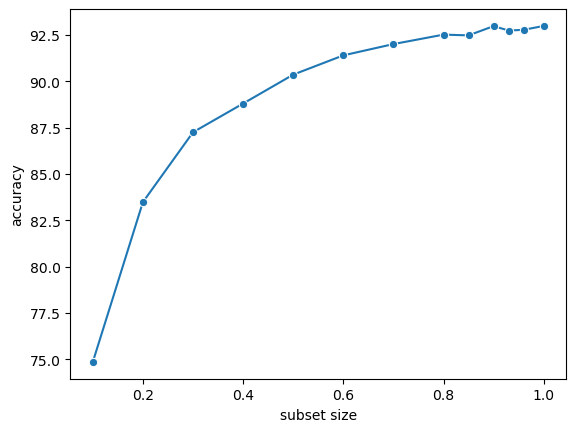

In [4]:
E.plot_acc_per_subset_size(exps)

In [5]:
p = {
    "num_epochs" : 150,
    "deficit_name": "CIFAR10SubsetDeficit",
    "deficit_params" : {"subset_size" : 1}
    }

exps = E.match_experiments(directories=['random_subset_results'],
                           params = p)

len(exps)

d = E.get_data(dir=exps[0][1], exp_id=exps[0][0])
test_accs = d[-1]
test_accs

[48.92,
 58.88,
 63.84,
 64.66,
 70.89,
 72.2,
 73.53,
 77.56,
 77.54,
 75.97,
 77.35,
 79.36,
 80.46,
 77.37,
 80.07,
 82.27,
 80.62,
 85.07,
 83.7,
 81.78,
 82.41,
 83.31,
 80.31,
 84.63,
 83.38,
 83.25,
 84.0,
 84.92,
 84.95,
 84.03,
 86.18,
 85.48,
 84.05,
 86.14,
 85.94,
 85.87,
 86.03,
 86.32,
 85.18,
 87.58,
 87.5,
 86.64,
 87.32,
 87.57,
 87.0,
 88.88,
 88.34,
 88.68,
 87.95,
 89.59,
 89.0,
 88.28,
 89.28,
 89.18,
 87.96,
 89.18,
 89.4,
 89.41,
 88.81,
 87.96,
 89.19,
 88.99,
 90.23,
 89.83,
 90.03,
 90.14,
 90.23,
 89.74,
 90.53,
 89.86,
 90.21,
 91.08,
 90.75,
 90.61,
 90.6,
 90.22,
 90.1,
 90.78,
 90.96,
 91.37,
 91.48,
 91.17,
 91.03,
 91.47,
 91.26,
 91.56,
 91.22,
 91.43,
 90.96,
 91.83,
 90.96,
 91.34,
 91.56,
 92.15,
 91.5,
 91.98,
 91.87,
 91.73,
 92.22,
 91.79,
 91.91,
 92.2,
 92.0,
 92.47,
 92.15,
 92.21,
 92.14,
 92.28,
 92.5,
 92.42,
 92.37,
 92.37,
 92.32,
 92.53,
 92.53,
 92.5,
 92.38,
 92.49,
 92.81,
 92.39,
 92.85,
 92.66,
 92.49,
 92.84,
 93.0,
 92.76,
 92.37,

13


<Axes: xlabel='subset size', ylabel='accuracy'>

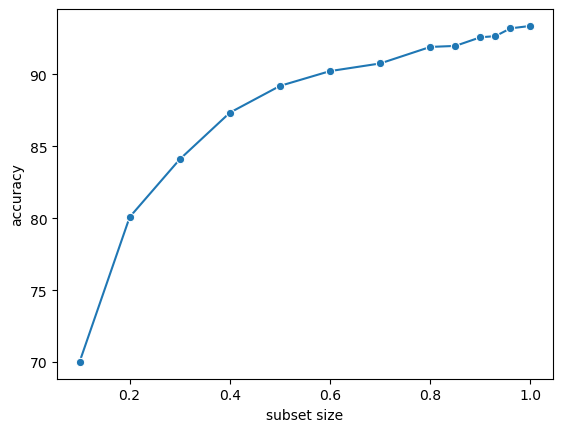

In [6]:

params = {
    #"num_epochs" : 150,
    "deficit_name": "SimilarityTypeDeficit"
    #"deficit_params": {"deficit_dura"}
          }
import datetime
#exps = E.match_experiments(directories=['studies/subset_size/random_subset_results'],
exps = E.match_experiments(directories=['different_size_similarity'],
                           params = params)#, dt = datetime.datetime(2025, 6, 24))

print(len(exps))

E.plot_acc_per_subset_size(exps)

In [7]:

params = {
    "deficit_name": "SimilarityTypeDeficit"
          }
exps_dis = E.match_experiments(directories=['different_size_disimilarity'],
                           params = params, dt = datetime.datetime(2025, 6, 24))

params = {
    "deficit_name": "SimilarityTypeDeficit"
          }
exps_sim = E.match_experiments(directories=['different_size_similarity'],
                           params = params)

params = {
    "num_epochs" : 150,
    "deficit_name": "CIFAR10SubsetDeficit"
          }
exps_rand = E.match_experiments(directories=['random_subset_results'],
                           params = params)

print(len(exps_rand))

13


<Axes: title={'center': 'Subset accuracy'}, xlabel='subset size', ylabel='accuracy'>

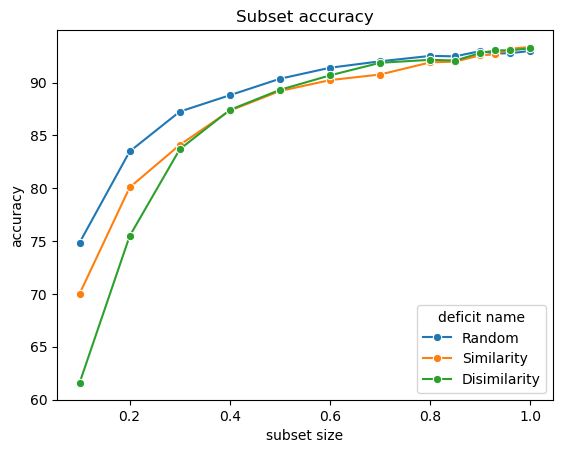

In [8]:
E.plot_all_acc_per_subset_size([exps_rand, exps_sim, exps_dis], ['Random', 'Similarity', 'Disimilarity'])
#E.plot_all_acc_per_subset_size([exps_rand], ['Random'])

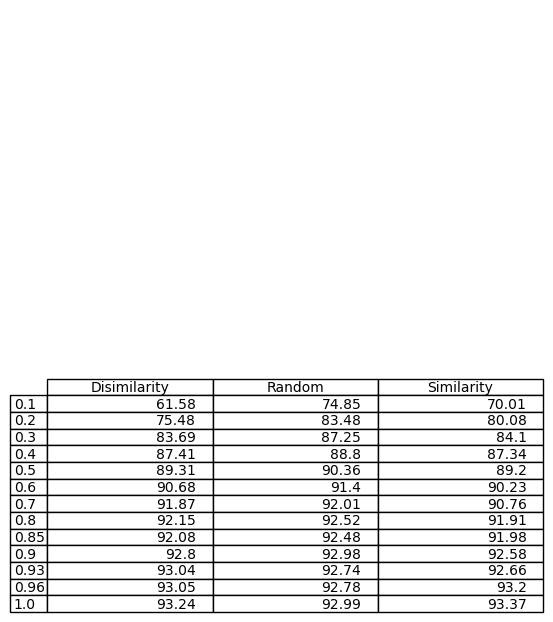

In [10]:

E.plot_table_acc_per_subset_size([exps_rand, exps_sim, exps_dis], ['Random', 'Similarity', 'Disimilarity'])